In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

### 1. Importing data and cleaning

In [252]:
df = pd.read_csv('BankStatement_Data.csv')
df.isnull().sum()

Date                0
Day                 0
Type               21
Category           21
Debit Amount        0
Credit Amount       0
Closing Balance     0
dtype: int64

In [253]:
df.dropna(inplace=True)
df = df.reset_index()

In [254]:
date_list = []
for i in df['Date']:
    date = i.split('/')
    d = dt.datetime(int(date[2]), int(date[1]), int(date[0]))
    date_list.append(d)

In [255]:
df['Date'] = date_list

In [256]:
df.drop('index', axis=1, inplace=True)

### 2. Seeing some pattern or trend. 

<Axes: >

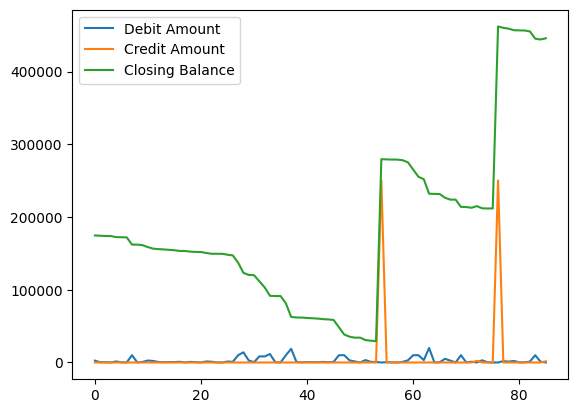

In [258]:
df.plot()

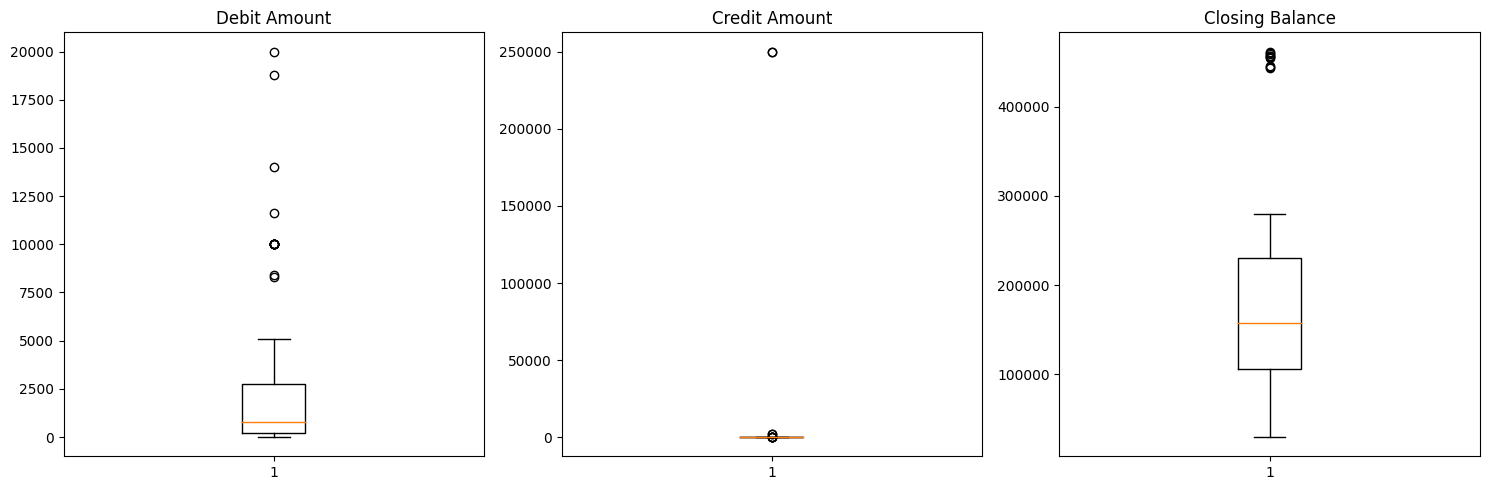

In [259]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each boxplot
axes[0].boxplot(df['Debit Amount'])
axes[0].set_title('Debit Amount')

axes[1].boxplot(df['Credit Amount'])
axes[1].set_title('Credit Amount')

axes[2].boxplot(df['Closing Balance'])
axes[2].set_title('Closing Balance')

plt.tight_layout()
plt.show()

### 3. Train and test split, but for time_series data, scaling and changing categorical to numerical ones.

In [280]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Day'] = le.fit_transform(df['Day'])
df['Type'] = le.fit_transform(df['Type'])

In [307]:
df['Debit Amount'].shape

(86,)

In [303]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Debit Amount'] = scaler.fit_transform(df['Debit Amount'])
df['Credit Amount'] = scaler.fit_transform(df['Credit Amount'])
df['Closing Balance'] = scaler.fit_transform(df['Closing Balance'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 2500.     324.     404.38   100.    1395.     225.     110.   10000.
     0.     818.    2704.84  2053.     659.75   404.38   577.5    577.5
   921.     108.     853.     397.     130.    1375.    1024.      50.
     0.    1305.     931.   10000.   14000.    2800.52   410.    8400.
  8296.   11610.     412.       0.   10000.   18777.     685.     126.
   548.     399.     445.     764.     386.     772.   10000.   10000.
  2949.49  1380.       0.    3300.     892.5    590.       0.     340.
   200.      33.5    830.    2880.09 10000.   10000.    3257.   20000.
   202.19   243.66  5089.    2569.88     0.   10000.     202.19  1000.
     0.    3000.65   202.19     0.       0.    1869.    1180.    2108.
   202.19   202.19  1185.   10000.    1155.75     0.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [282]:
X = df.drop(['Category', 'Date'], axis = 1)
y = df['Category']

In [284]:
n_split = int(0.75 * len(df))
X_train = X[:n_split]
X_test = X[n_split:]

y_train = y[:n_split]
y_test = y[n_split:]

### 4. Trying a model
- RandomForestClassifier
- Simple LR
- SVM
- Decision Tree
- Maybe a neural network

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [313]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [329]:
preds = lr.predict(X_test)
print(classification_report(preds, y_test, zero_division=0.0))

               precision    recall  f1-score   support

          ATM       0.00      0.00      0.00         0
Entertainment       0.00      0.00      0.00         0
     Interest       1.00      0.80      0.89         5
      Medical       0.00      0.00      0.00         0
       Salary       0.00      0.00      0.00         0
     Shopping       1.00      0.53      0.69        17

     accuracy                           0.59        22
    macro avg       0.33      0.22      0.26        22
 weighted avg       1.00      0.59      0.74        22



In [353]:
Categories = list(set(df['Category']))


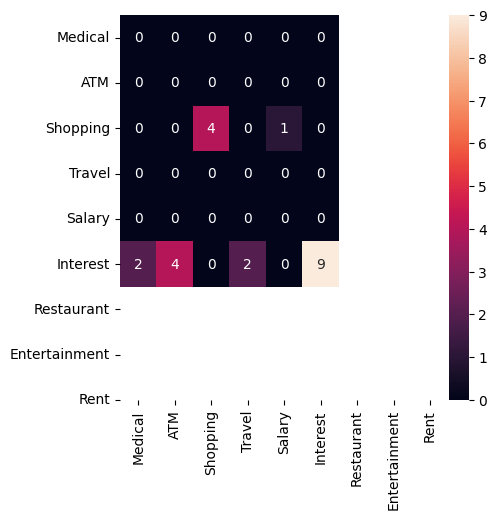

In [355]:
conf = confusion_matrix(preds, y_test)

plt.figure(figsize=(5,5))
sns.heatmap(conf, annot=True, xticklabels=Categories, yticklabels=Categories)
plt.show()